# **ASSIGNMENT 3**

Nama : Muhammad Rafi Ramadhan <br>
<br>
Kelas : PYTN-KS-012 <br>
<br>
Kode Peserta : PYTN-KS12-002 <br>

# **Project Overview**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

# **Import Library**

Melakukan penginstallan library library yang akan di gunakan dalam assignment kali ini, kemudian Import library yang akan digunakan kedalam noteboo

In [208]:
#untuk pemrosesan data
import pandas as pd
import numpy as np

#untuk keperluan plotting
import matplotlib.pyplot as plt
import seaborn as sns

#analisis statistik
import scipy.stats
import scipy.stats as scistats
import statsmodels.api as sm
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Data Loading**

In [209]:
#Memanggil data bank-additional-full.csv
bank = pd.read_csv('E:/Kuliah/Semester 6/Hacktiv8/Python Assignment/3/bank-additional-full.csv', sep=';')
pd.set_option('display.max_columns', None)
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [210]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Keterangan:

1.	**Age** :  data numerik yang menyatakan usia klien.
2.	**Job** :  jenis pekerjaan klien dalam bentuk kategori, seperti 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', atau 'unknown' (tidak diketahui).
3.	**Marital** :  status pernikahan klien dalam bentuk kategori, yaitu 'divorced' (bercerai), 'married' (menikah), 'single' (belum menikah), atau 'unknown' (tidak diketahui). Perlu diingat bahwa 'divorced' dapat merujuk pada status bercerai atau duda/janda.
4.	**Education** :  tingkat pendidikan klien dalam bentuk kategori, seperti 'basic.4y' (pendidikan dasar 4 tahun), 'basic.6y' (pendidikan dasar 6 tahun), 'basic.9y' (pendidikan dasar 9 tahun), 'high.school' (sekolah menengah atas), 'illiterate' (buta huruf), 'professional.course' (kursus profesional), 'university.degree' (gelar sarjana), atau 'unknown' (tidak diketahui).
5.	**Default** :  apakah klien memiliki kredit yang macet atau tidak, dalam bentuk kategori 'no' (tidak), 'yes' (ya), atau 'unknown' (tidak diketahui).
6.	**Housing** :  apakah klien memiliki pinjaman rumah atau tidak, dalam bentuk kategori 'no' (tidak), 'yes' (ya), atau 'unknown' (tidak diketahui).
7.	**Loan** :  apakah klien memiliki pinjaman pribadi atau tidak, dalam bentuk kategori 'no' (tidak), 'yes' (ya), atau 'unknown' (tidak diketahui).
8.	**Contact** :  jenis komunikasi yang digunakan saat terakhir kali menghubungi klien, dalam bentuk kategori 'cellular' (ponsel) atau 'telephone' (telepon).
9.	**Month** :  bulan terakhir saat melakukan kontak dengan klien dalam setahun, dalam bentuk kategori seperti 'jan' (Januari), 'feb' (Februari), 'mar' (Maret), ..., 'nov' (November), 'dec' (Desember).
10.	**Day_of_week** :  hari terakhir saat melakukan kontak dengan klien dalam seminggu, dalam bentuk kategori seperti 'mon' (Senin), 'tue' (Selasa), 'wed' (Rabu), 'thu' (Kamis), atau 'fri' (Jumat).
11.	**Duration** :  durasi kontak terakhir dengan klien dalam hitungan detik. Penting untuk dicatat bahwa atribut ini memiliki pengaruh besar terhadap target yang diinginkan (yaitu, jika durasi=0, maka y='no'). Namun, durasi kontak ini tidak diketahui sebelum panggilan dilakukan. Oleh karena itu, atribut ini sebaiknya hanya digunakan untuk tujuan perbandingan (benchmark) dan sebaiknya diabaikan jika tujuannya adalah membuat model prediksi yang realistis.
12.	**Campaign** :  jumlah kontak yang dilakukan selama kampanye ini untuk klien tertentu, termasuk kontak terakhir yang dilakukan.
13.	**Pdays** :  jumlah hari yang telah berlalu setelah klien terakhir kali dihubungi dari kampanye sebelumnya. Jika nilai atribut ini adalah 999, itu berarti klien tidak pernah dihubungi sebelumnya.
14.	**Previous** :  jumlah kontak yang dilakukan sebelum kampanye ini untuk klien tertentu.
15.	**Poutcome** :  hasil dari kampanye pemasaran sebelumnya untuk klien tertentu. Nilai-nilai kategorinya adalah 'failure' (gagal), 'nonexistent' (tidak ada), atau 'success' (sukses).
16.	**Emp.var.rate** :  indikator kuartalan dari variasi tingkat ketenagakerjaan dalam bentuk numerik.
17.	**Cons.price.idx**:  indikator bulanan dari indeks harga konsumen dalam bentuk numerik.
18.	**Cons.conf.idx**:  indikator bulanan dari indeks kepercayaan konsumen dalam bentuk numerik.
19.	**Euribor3m**:  indikator harian dari tingkat suku bunga Euribor 3 bulan dalam bentuk numerik.
20.	**Nr.employed** :  indikator kuartalan dari jumlah karyawan dalam bentuk numerik.


Output Variable:

21. **Y** :  variabel target yang ingin diprediksi.  apakah klien telah berlangganan deposito jangka pendek atau tidak, dalam bentuk biner 'yes' (ya) atau 'no' (tidak).



# **Data Cleaning**

In [211]:
#Mengecek jumlah data yang duplikat
bank.duplicated().sum()

12

Dari kode tersebut, terdapat 12 data duplikat, dengan begitu kita drop yang duplikat.

In [212]:
#Menghapus kolom yang duplikat
bank.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Maka, setelah melakukan drop pada data yang duplikat, data shape yang sebelumnya 41188 rows x 21 columns sekarang menjadi 41176 rows x 21 columns.

## Missing Value

In [213]:
miss_bank = pd.DataFrame({"Missing Value":bank.isna().sum(), "Persentase":bank.apply(lambda x: f'{((x.isnull().sum()/bank.shape[0])*100).round(2)} %')})
miss_bank


,Missing Value,Persentase
age,0,0.0 %
job,0,0.0 %
marital,0,0.0 %
education,0,0.0 %
default,0,0.0 %
housing,0,0.0 %
loan,0,0.0 %
contact,0,0.0 %
month,0,0.0 %
day_of_week,0,0.0 %


In [214]:
bank.isin(['unknown']).sum().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

Dapat kita lihat bahwa dataset tidak memiliki null atau NaN, namun memiliki nilai 'unknown' sehingga perlu dihilangkan dengan terlebih dahulu menggolongkan kolom pada dataset berdasarkan tipe data untuk mempermudah pengisian yang kemudian dilakukan pengisian terhadap missing value tersebut.

In [215]:
# Megetahui kolom yang memiliki tipe data numerik
num_cols = bank.select_dtypes(include=['float64', 'int64']).columns
print(num_cols)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [216]:
bank[num_cols].nunique().sort_values(ascending = False)

duration          1544
euribor3m          316
age                 78
campaign            42
pdays               27
cons.price.idx      26
cons.conf.idx       26
nr.employed         11
emp.var.rate        10
previous             8
dtype: int64

In [217]:
categorical_cols = bank.select_dtypes(include='object').columns
for col in categorical_cols:
    bank[col] = bank[col].astype('category')

In [218]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [219]:
for cat in categorical_cols:
    print("Nilai unik untuk kolom ", cat.upper())
    print(bank[cat].unique())
    print('='*30)
bank[categorical_cols].nunique().sort_values(ascending = False)

Nilai unik untuk kolom  JOB
['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']
Nilai unik untuk kolom  MARITAL
['married', 'single', 'divorced', 'unknown']
Categories (4, object): ['divorced', 'married', 'single', 'unknown']
Nilai unik untuk kolom  EDUCATION
['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
Categories (8, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']
Nilai unik untuk kolom  DEFAULT
['no', 'unknown', 'yes']
Categories (3, object): ['no', 'unknown', 'yes']
Nilai unik untuk kolom  HOUSING
['no', 'yes', 'unknown']
Categories (3, object): ['no', 'unknown', 'yes']
Nilai unik untuk kolom  LOAN


job            12
month          10
education       8
day_of_week     5
marital         4
default         3
housing         3
loan            3
poutcome        3
contact         2
y               2
dtype: int64

Kolom yang memiliki tipe data objek di konversi menjadi categorial demi menghemat memori dan memperlancar pengolahan data. Kemudian dapat kita lihat juga bahwa pada dataset yang masih memiliki missing value dalam bentuk 'unknown' itu adalah pada tipe data categorial, sehingga kita perlu mengisinya dengan nilai yang paling sering keluar.

In [220]:
bank.replace('unknown', np.nan, inplace=True)

In [221]:
#mengecek kembali jumlah "unknown" di setiap atribut
(bank == 'unknown').sum().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [222]:
for cat in categorical_cols:
    imputer = SimpleImputer(strategy='most_frequent')
    bank[categorical_cols] = imputer.fit_transform(bank[categorical_cols])

bank[categorical_cols] = bank[categorical_cols].astype('category')


In [223]:
#Jumlah missing values pada data train
print("Jumlah NaN missing values atribut kategori =",bank[categorical_cols].isna().sum().sum())
print("Jumlah NaN missing values atribut numerikal =",bank[num_cols].isnull().sum().sum())

Jumlah NaN missing values atribut kategori = 0
Jumlah NaN missing values atribut numerikal = 0


In [224]:
#Mengecek Jumlah Missing Values setelah melakukan imputasi nilai missing values
print("JUMLAH NaN MISSING VALUES ATRIBUT KATEGORI FINAL =",bank[categorical_cols].isnull().sum().sum())

JUMLAH NaN MISSING VALUES ATRIBUT KATEGORI FINAL = 0


Dapat dilihat bahwa, awalnya terdapat missing value pada data sejumlah 12718 pada kolom bertipe data kategorikal. Namun, setelah 'unknown' dijadikan NaN dan dilakukan imutasi nilai missing value tersebut, maka jumlah missing values final untuk atribut kategorikal menjadi 0.

# **Data Exploration**

In [278]:
bank_clean = bank.copy()
bank_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [279]:
bank_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [280]:
#Deskriptif statistik data numerik
bank_clean[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [281]:
#Deskriptif statistik data kategori
bank_clean[categorical_cols].describe().transpose()

,count,unique,top,freq
job,41188,11,admin.,10752
marital,41188,3,married,25008
education,41188,7,university.degree,13899
default,41188,2,no,41185
housing,41188,2,yes,22566
loan,41188,2,no,34940
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


Dari data diatas kita dapat mengetahui statistik deskriptif untuk masing-masing tipe data pada dataset.

In [282]:
#Pengelompokan data pada kolom y dan menghitung jumlah data pada tiap kelompok
bank_clean.groupby('y').count().transpose()

y,no,yes
age,36548,4640
job,36548,4640
marital,36548,4640
education,36548,4640
default,36548,4640
housing,36548,4640
loan,36548,4640
contact,36548,4640
month,36548,4640
day_of_week,36548,4640


In [283]:
print("Jumlah Berlangganan Term Deposit:")
print(bank_clean[categorical_cols[10]].value_counts())

Jumlah Berlangganan Term Deposit:
no     36548
yes     4640
Name: y, dtype: int64


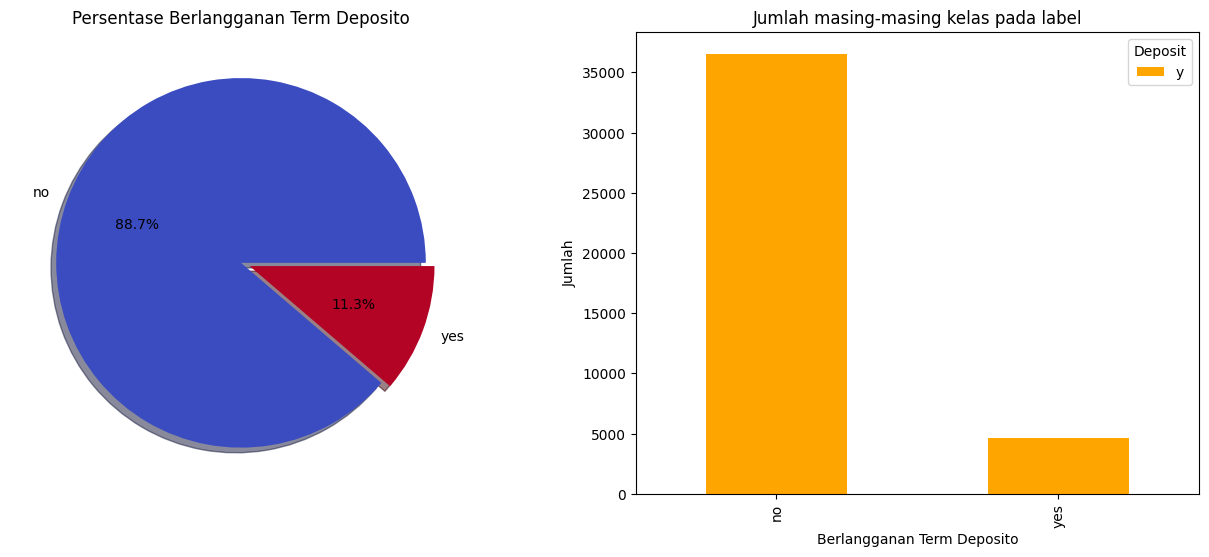

In [284]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# Persentase "y (Berlangganan Term Deposit)"
bank_clean['y'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    explode=[0,0.05], 
    cmap='coolwarm',
    shadow=True,
    ax=ax[0]
)
ax[0].set_title('Persentase Berlangganan Term Deposito')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
bank.groupby('y').agg({'y':'count'}).plot(
    kind='bar',
    color='orange',
    ax=ax[1]
)
ax[1].set_title('Jumlah masing-masing kelas pada label')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Berlangganan Term Deposito')
ax[1].legend(title='Deposit')

Berdasarkan data visualisasi (pie chart) dan data analisis jumlah term berlangganan deposito tersebut, Presentase berlangganan term deposito yaitu 88,7% untuk 'no' atau sejumlah 36548 klien tidak berlangganan dan 11,3% untuk 'yes'atau sejumlah 4640 klien berlangganan.

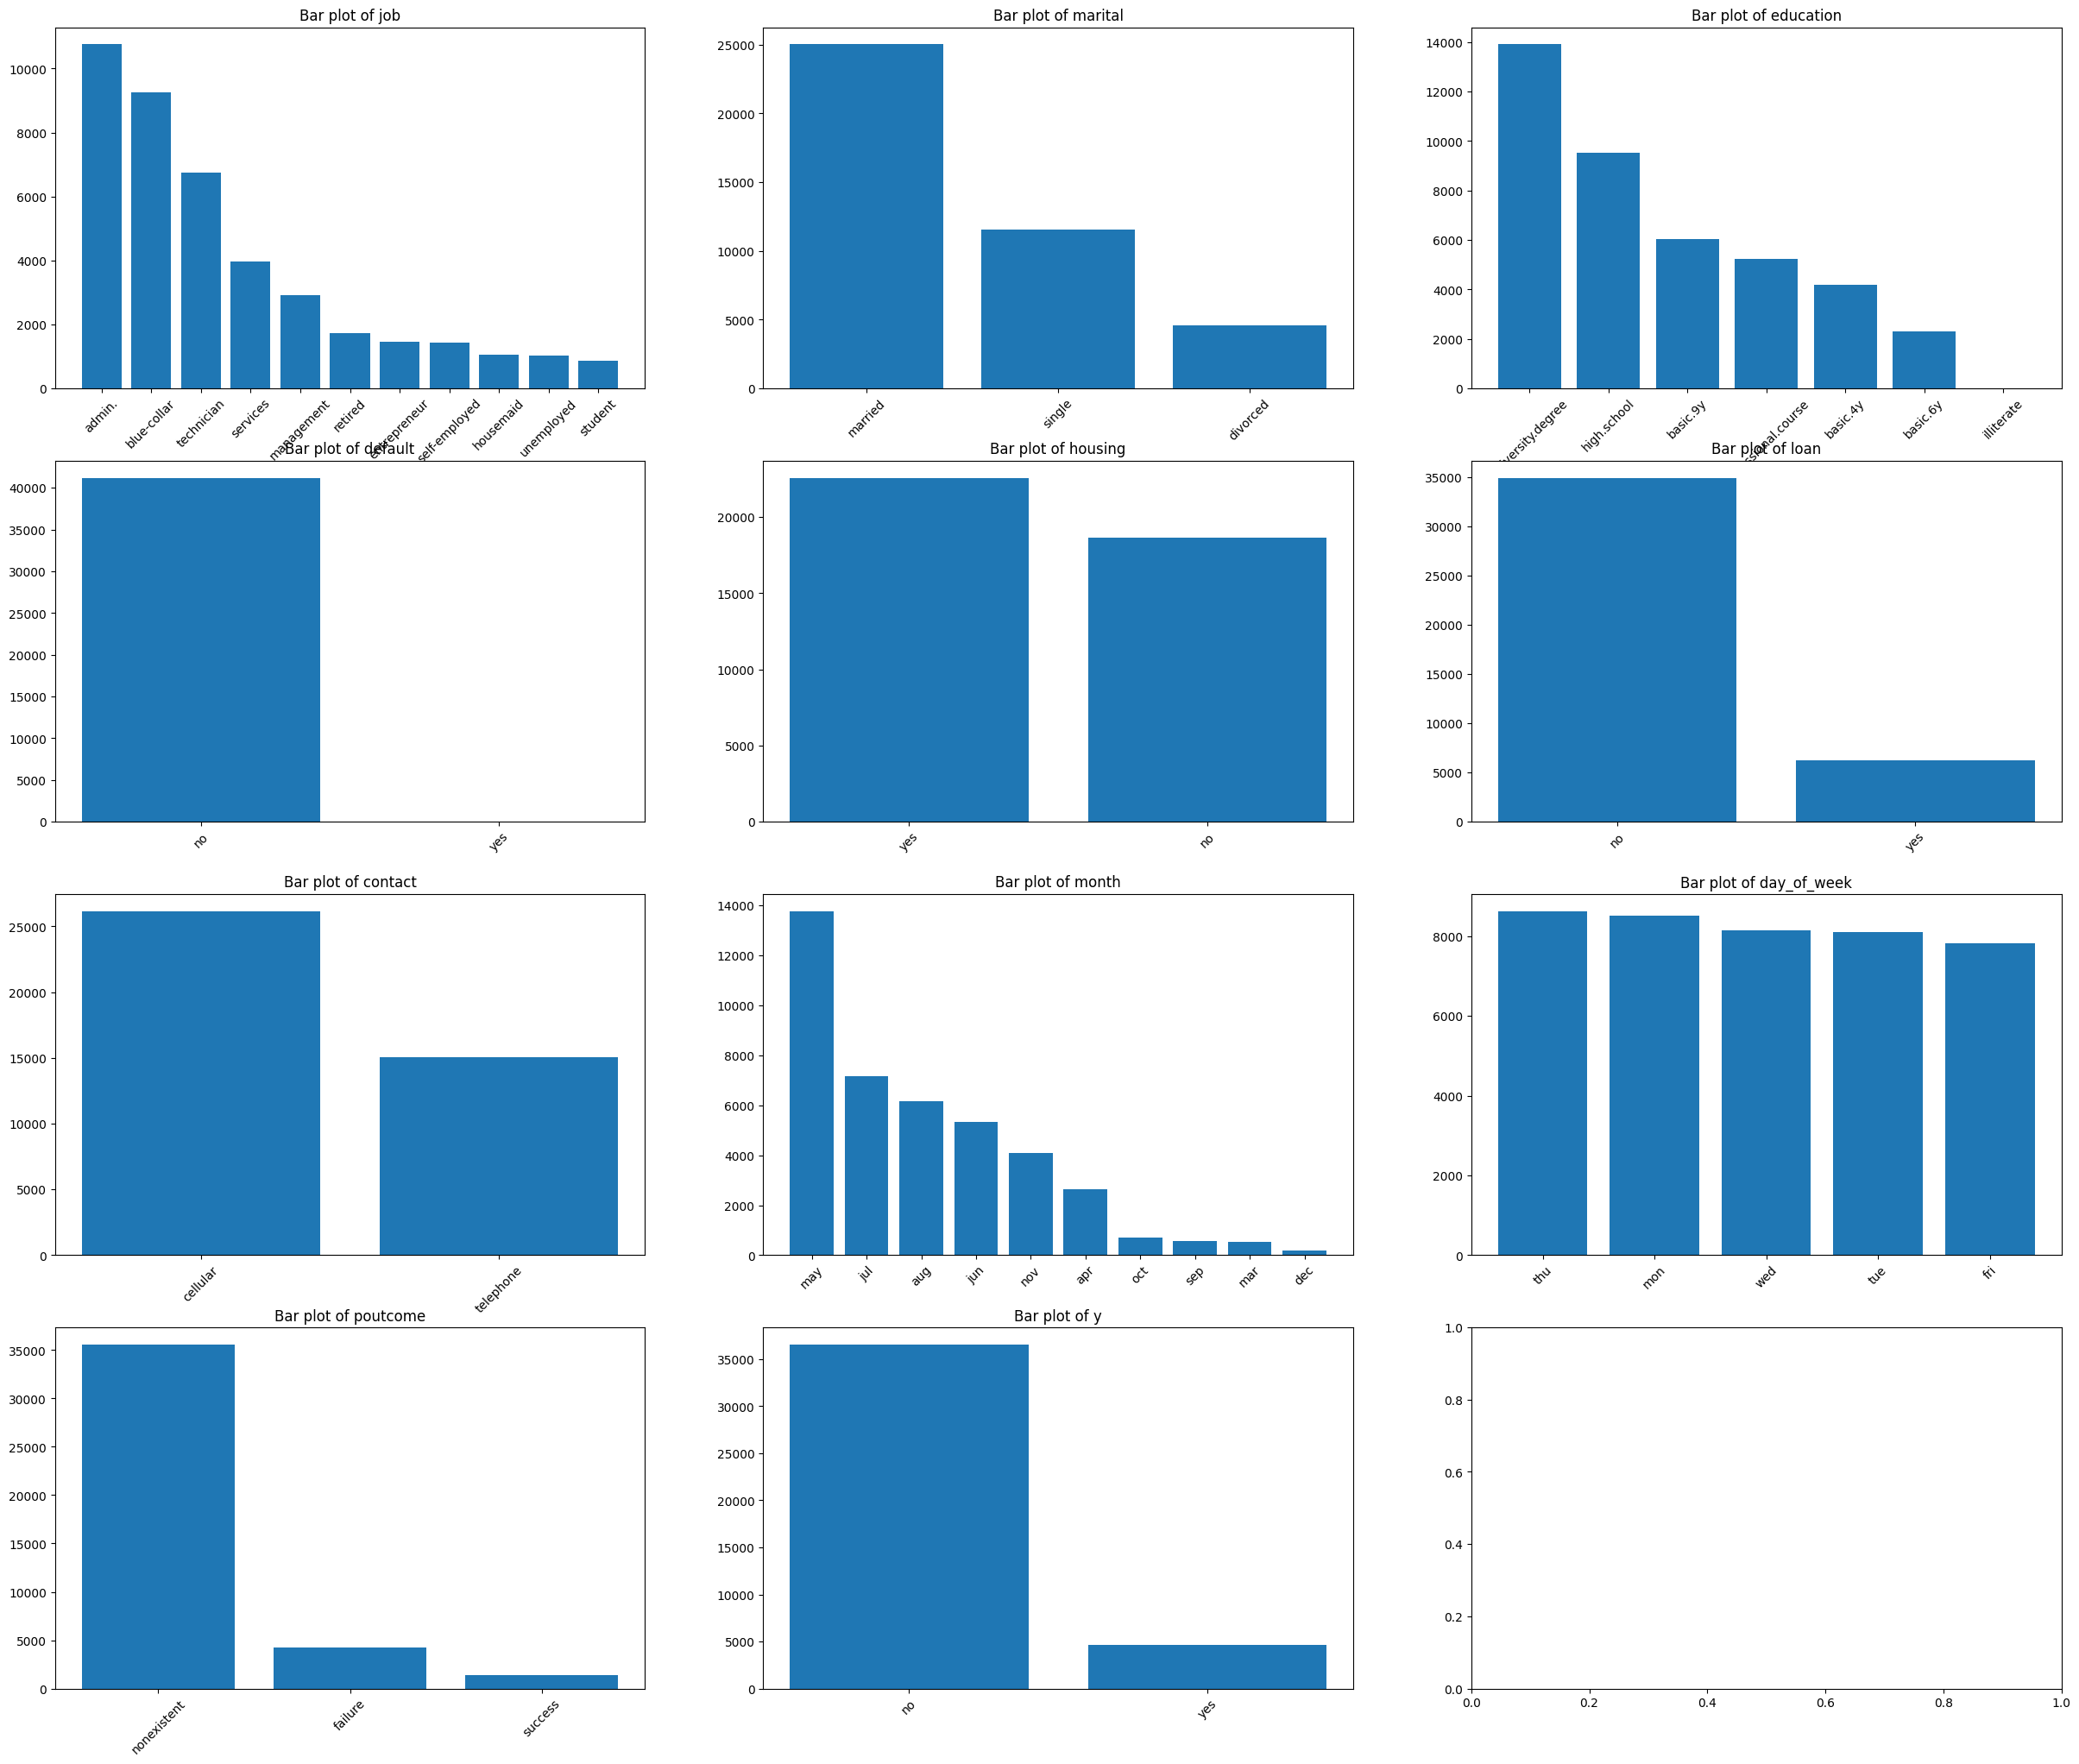

In [285]:
# Categorical columns exploration
fig, ax = plt.subplots(4,3, sharex=False, sharey=False, figsize=(30,25))
count = 0
for cat in categorical_cols:
    value_count = bank[cat].value_counts()
    ax_x = count//3
    ax_y = count%3
    x_range = np.arange(0, len(value_count))
    ax[ax_x, ax_y].bar(x_range, value_count.values, tick_label=value_count.index)
    ax[ax_x, ax_y].set_title(f"Bar plot of {cat}")
    
    for i in ax[ax_x, ax_y].get_xticklabels():
        i.set_rotation(45)
    
    count+=1
plt.show()

- Dapat dilihat bahwa berdasarkan barchart tersebut, dalam kategori job pada klien, pekerjaan admin memiliki jumlah terbanyak disusul oleh e-collar, dan yang paling rendah adalah student.
- Pada marital (status pernikahan) klien, jumlah terbanyak ada pada married. Untuk education dari klien jumlah terbanyak adalah pelanggan yang bergelar degree.
- Banyak dari klien yang memiliki pinjaman perumahan dibandingkan tidak dan banyak klien yang tidak memiliki pinjaman pribadi.
- Untuk jenis komunikasi kontak, kebanyakan melalui cellular dibandingkan telephone.
- Untuk month (kontak terakhir) yang tertinggi adalah dibulan mei, disusul bulan Juli, dan yang paling rendah adalah Desember.
- Untuk hari kontak terakhir dalam seminggunya yang tertinggi adalah hari Kamis dan yang paling rendah adalah Jumat.
- Pada barchart poutcome (hasil kampanye pemasaran) yang tertinggi adalah nonexistent (tidak ada) dan terendah adalah success (berhasil).

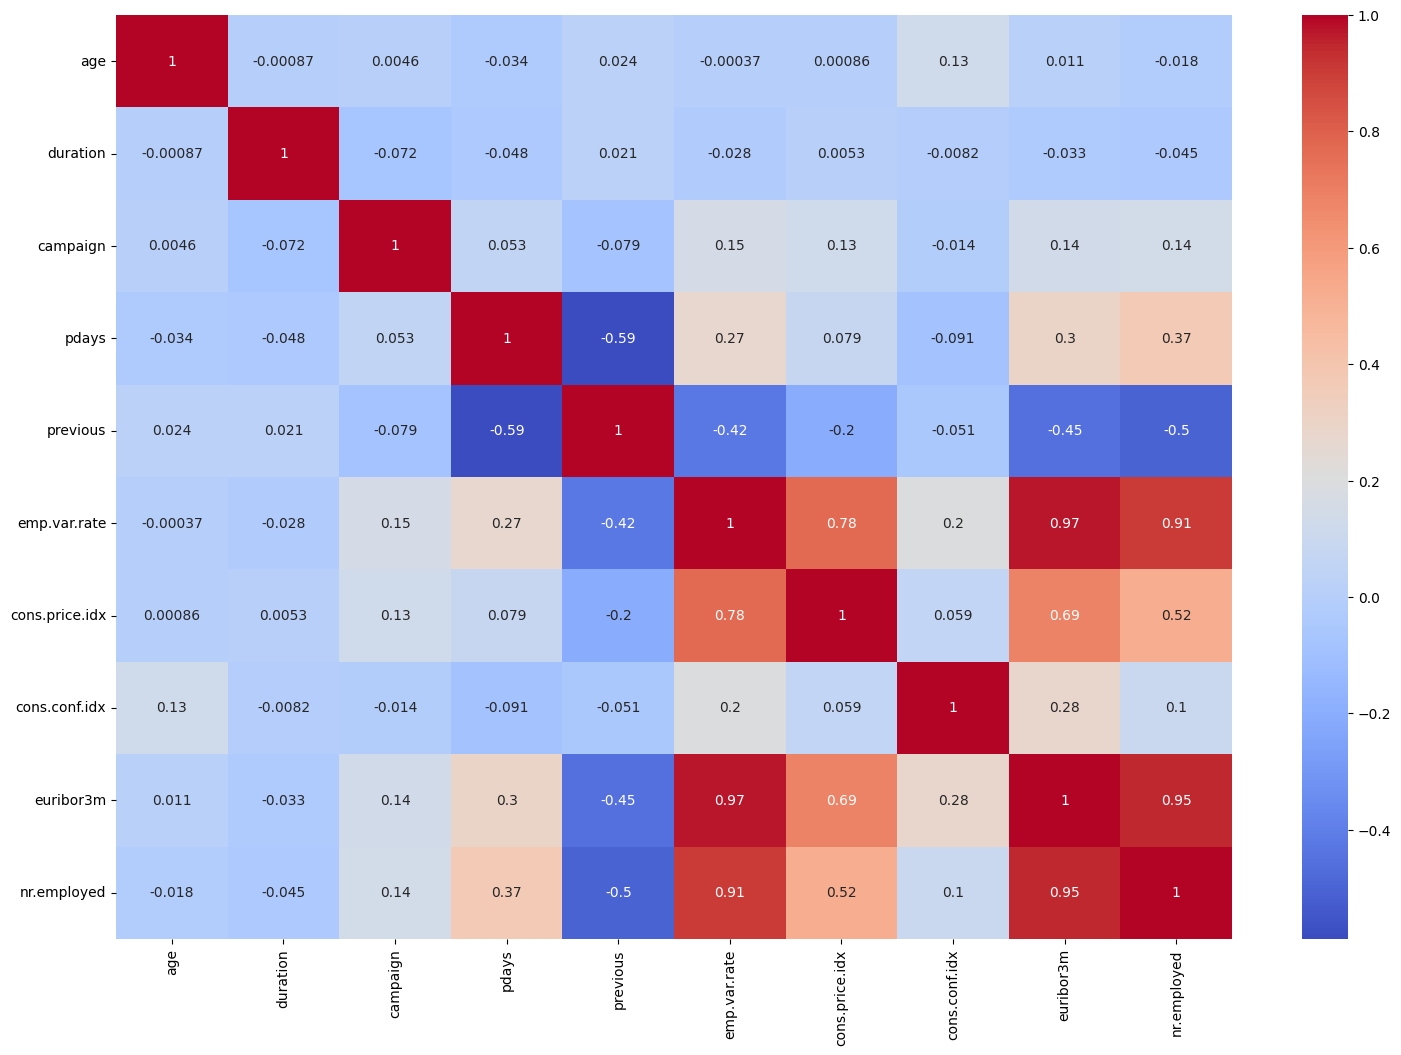

In [286]:
# melihat korelasi antar atribut
plt.figure(figsize=(18,12))
sns.heatmap(bank_clean.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=90)
plt.show()

In [287]:
bank_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [289]:
bank_clean.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [290]:
bank_clean['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [291]:
# Mengubah variabel target menjadi numerik ('yes' -> 1, 'no' -> 0)
bank_clean['y'] = bank_clean['y'].str.strip()  # Menghapus spasi pada nilai
bank_clean['y'] = bank_clean['y'].map({'yes': 1, 'no': 0})
bank_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


<Axes: >

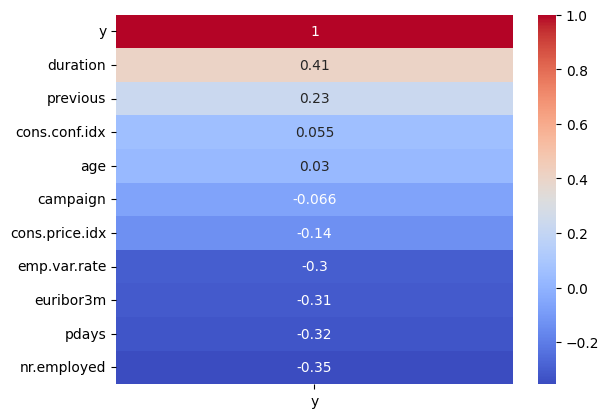

In [292]:
# Menghitung korelasi antara semua atribut dengan variabel target
correlation_matrix = bank_clean.corr()['y'].sort_values(ascending=False)

# Menampilkan hasil korelasi dalam bentuk heatmap
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm')

Dapat dilihat bahwa dari heatmap diatas korelasi semua atribut terhadap variable target, untuk membuat model saya tetapkan bahwa ambang batas yang digunakan adalah +- 0.1, sehingga  atribut-atribut yang berpotensi menjadi kolom pembantu prediksi variabel target berdasarkan hasil korelasi adalah 'duration', 'previous', 'cons.price.idx', 'emp.var.rate', 'euribor3m', 'pdays', 'nr.employed'.

# **Data Preprocessing**

In [293]:
bank_processed = bank_clean.copy()
bank_processed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [294]:
bank_processed.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [295]:
bank_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [296]:
# Mengidentifikasi kolom yang akan dihapus
columns_to_drop = [col for col in bank_processed.columns if col not in ['duration', 'previous', 'cons.price.idx', 'emp.var.rate', 'euribor3m', 'pdays', 'nr.employed', 'y']]

# Menghapus kolom-kolom yang tidak dibutuhkan
bank_processed.drop(columns_to_drop, axis=1, inplace=True)
bank_processed.head()

,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,261,999,0,1.1,93.994,4.857,5191.0,0
1,149,999,0,1.1,93.994,4.857,5191.0,0
2,226,999,0,1.1,93.994,4.857,5191.0,0
3,151,999,0,1.1,93.994,4.857,5191.0,0
4,307,999,0,1.1,93.994,4.857,5191.0,0


## Data Splitting

Dilakukan Pembagian data untuk pembuatan model, dimana data training akan memiliki 70% dari jumlah data dan data testing memiliki 30% dari jumlah data. 

In [297]:
selected_feature = ['duration', 'previous', 'cons.price.idx', 'emp.var.rate', 'euribor3m', 'pdays', 'nr.employed']
target = ['y']

# Pisahkan fitur dan label
X = bank_processed[selected_feature]
y = bank_processed[target]

# Split dataset ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melakukan proses scaling pada variabel prediktor
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cetak jumlah data pada masing-masing set
print("Jumlah data pada X_train: ", len(X_train))
print("Jumlah data pada y_train: ", len(y_train))
print("Jumlah data pada X_test: ", len(X_test))
print("Jumlah data pada y_test: ", len(y_test))


Jumlah data pada X_train:  28831
Jumlah data pada y_train:  28831
Jumlah data pada X_test:  12357
Jumlah data pada y_test:  12357


In [298]:
bank_processed.head()

,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,261,999,0,1.1,93.994,4.857,5191.0,0
1,149,999,0,1.1,93.994,4.857,5191.0,0
2,226,999,0,1.1,93.994,4.857,5191.0,0
3,151,999,0,1.1,93.994,4.857,5191.0,0
4,307,999,0,1.1,93.994,4.857,5191.0,0


# **Pendefinisian Model**

## Logistic Regression

In [299]:
# Initialize logistic regression model and fit to training set
log_reg = LogisticRegression(max_iter=10000, solver='liblinear')
log_reg.fit(X_train, y_train.values.ravel())

# Membuat prediksi menggunakan testing set
y_pred_log = log_reg.predict(X_test)

# Menghitung model metrik-metrik
print('Train Score: {:.4f}'.format(log_reg.score(X_train, y_train)))
print('Test Score:  {:.4f}'.format(log_reg.score(X_test, y_test)))
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_log)))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred_log))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred_log, pos_label=1)))
print('Recall: {:.4f}'.format( recall_score(y_test, y_pred_log, pos_label=1)))
print('F1-score: {:.4f}'.format(f1_score(y_test, y_pred_log, pos_label=1)))

Train Score: 0.9059
Test Score:  0.9103
Accuracy: 0.9103
Confusion Matrix:  [[10713   255]
 [  854   535]]
Precision: 0.6772
Recall: 0.3852
F1-score: 0.4911



Model Logistic Regression memiliki performa yang konsisten antara data training dan data testing dengan Train Score: 0.9059 dan Test Score: 0.9103. Akurasi model sebesar 91.03% menunjukkan tingkat keberhasilan model dalam memprediksi kelas positif dan negatif. Confusion Matrix menggambarkan jumlah prediksi yang benar dan salah, di mana terdapat 10713 prediksi benar untuk kelas negatif, 255 prediksi salah untuk kelas negatif, 854 prediksi salah untuk kelas positif, dan 535 prediksi benar untuk kelas positif. Precision sebesar 0.6772 menunjukkan kemampuan model dalam mengidentifikasi dengan benar data positif, sementara recall sebesar 0.3852 menunjukkan kemampuan model dalam mengenali kembali data positif yang sebenarnya. F1-score sebesar 0.4911 menggambarkan keseimbangan antara precision dan recall.

## K-Nearest Neighbors

In [301]:
# Inisialisasi model K-Nearest Neighbors
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

# Menghilangkan peringatan
warnings.filterwarnings("ignore", category=UserWarning)

# Fit model ke training set
knn.fit(X_train_scaled, y_train.values.ravel())

# Melakukan prediksi menggunakan testing set
y_pred_knn = knn.predict(X_test_scaled)

# Calculate model metrik-metrik
print('Train Score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test Score:  {:.4f}'.format(knn.score(X_test, y_test)))
print('Model Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_knn)))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred_knn))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred_knn, pos_label=1)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred_knn, pos_label=1)))
print('F1-score: {:.4f}'.format(f1_score(y_test, y_pred_knn, pos_label=1)))

Train Score: 0.1129
Test Score:  0.1124
Model Accuracy: 0.9055
Confusion Matrix:  [[10466   502]
 [  666   723]]
Precision: 0.5902
Recall: 0.5205
F1-score: 0.5532


Model K-Nearest Neighbors (KNN) memiliki konsistensi rendah antara data training dan data testing, yang dapat mengindikasikan adanya overfitting atau underfitting. Meskipun model memiliki akurasi sebesar 90.55% dalam memprediksi dengan benar kelas positif maupun kelas negatif, performanya masih rendah dalam mengklasifikasikan kelas positif dengan benar. Confusion Matrix menunjukkan bahwa terdapat banyak prediksi yang salah untuk kelas positif, sementara Precision, Recall, dan F1-score menunjukkan kinerja yang moderat dalam mengidentifikasi dan mengingat data positif yang sebenarnya.

## Support Vector Machine

In [302]:
# Inisialisasi model SVM dan fit ke training set
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_scaled, y_train.values.ravel())

# Membuat prediksi menggunakan testing set
y_pred_svm = svm.predict(X_test_scaled)

# Menghitung model metrik-metrik
print('Train Score: {:.4f}'.format(svm.score(X_train, y_train)))
print('Test Score: {:.4f}'.format(svm.score(X_test, y_test)))
print('Model Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_svm)))
print('Confusion Matrix: ', (confusion_matrix(y_test, y_pred_svm)))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred_svm, pos_label=1)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred_svm, pos_label=1)))
print('F1-score: {:.4f}'.format(f1_score(y_test, y_pred_svm, pos_label=1)))

Train Score: 0.8907
Test Score: 0.8908
Model Accuracy: 0.8968
Confusion Matrix:  [[10787   181]
 [ 1094   295]]
Precision: 0.6197
Recall: 0.2124
F1-score: 0.3164


Model SVM dengan Train Score: 0.8907 dan Test Score: 0.8908 memiliki konsistensi yang tinggi antara data training dan testing, serta akurasi sebesar 89.68%. Confusion Matrix menunjukkan bahwa model ini mampu mengklasifikasikan 10787 data negatif dengan benar (true negative), tetapi juga menghasilkan 181 prediksi yang salah (false positive) untuk data negatif. Selain itu, model ini mengalami kesulitan dalam mengenali kembali (recall) data positif yang sebenarnya, dengan hanya mencapai nilai 0.2124. Meskipun memiliki precision sebesar 0.6197, menunjukkan kemampuan model dalam mengidentifikasi dengan benar data positif, nilai F1-score yang sebesar 0.3164 menunjukkan adanya ketidakseimbangan antara precision dan recall.

## Decision Tree

In [303]:
# Inisialisasi model Decision Tree dan fit ke training set
dt = DecisionTreeClassifier(max_depth=10, random_state=10)
dt.fit(X_train_scaled, y_train)

# Membuat prediksi menggunakan testing set
y_pred_dt = dt.predict(X_test_scaled)

# Menghitung model metrik-metrik
print('Train Score: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test Score: {:.4f}'.format(dt.score(X_test, y_test)))
print('Model Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_dt)))
print('Confusion Matrix: ', (confusion_matrix(y_test, y_pred_dt)))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred_dt, pos_label=1)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred_dt, pos_label=1)))
print('F1-score: {:.4f}'.format(f1_score(y_test, y_pred_dt, pos_label=1)))

Train Score: 0.1215
Test Score: 0.1172
Model Accuracy: 0.9100
Confusion Matrix:  [[10517   451]
 [  661   728]]
Precision: 0.6175
Recall: 0.5241
F1-score: 0.5670


Model Decision Tree menunjukkan konsistensi rendah antara data training dan data testing dengan Train Score: 0.1215 dan Test Score: 0.1172, yang bisa mengindikasikan overfitting atau underfitting. Meskipun demikian, akurasi model ini mencapai 91.00% yang menandakan keberhasilannya dalam memprediksi baik kelas positif maupun kelas negatif. Confusion Matrix menunjukkan bahwa terdapat 10517 prediksi benar untuk kelas negatif, 451 prediksi salah untuk kelas negatif, 661 prediksi salah untuk kelas positif, dan 728 prediksi benar untuk kelas positif. Dengan presisi sebesar 0.6175, model mampu mengidentifikasi dengan benar data positif, namun sensitivitas sebesar 0.5241 menunjukkan kemampuan yang kurang dalam mengingat kembali data positif yang sebenarnya. F1-score sebesar 0.5670 merupakan metrik yang menggabungkan presisi dan sensitivitas, menunjukkan keseimbangan antara keduanya.


## Random Forest

In [304]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train.values.ravel())
y_pred_rf = rf.predict(X_test)

# Menghitung model metrik-metrik
print('Train Score: {:.4f}'.format(rf.score(X_train, y_train)))
print('Test Score: {:.4f}'.format(rf.score(X_test, y_test)))
print('Model Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_rf))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred_rf, pos_label=1)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred_rf, pos_label=1)))
print('F1-score: {:.4f}'.format(f1_score(y_test, y_pred_rf, pos_label=1)))

Train Score: 0.9392
Test Score: 0.9140
Model Accuracy: 0.9140
Confusion Matrix: [[10570   398]
 [  665   724]]
Precision: 0.6453
Recall: 0.5212
F1-score: 0.5767


Model ini memiliki Train Score 0.9392 dan Test Score 0.9140, menunjukkan konsistensi yang tinggi antara data training dan testing. Akurasi model sebesar 91.40%, dengan Confusion Matrix menunjukkan 10570 prediksi benar untuk kelas negatif, 398 prediksi salah untuk kelas negatif, 665 prediksi salah untuk kelas positif, dan 724 prediksi benar untuk kelas positif. Precision 0.6453 menunjukkan kemampuan model mengidentifikasi data positif dengan benar, sedangkan Recall 0.5212 menunjukkan kemampuan model menemukan kembali data positif yang sebenarnya. F1-score sebesar 0.5767 mencerminkan keseimbangan antara precision dan recall. Secara keseluruhan, model Random Forest memberikan hasil yang baik dengan akurasi yang tinggi, tetapi dapat ditingkatkan untuk menemukan kembali data positif yang sebenarnya.

## Naive Bayes

In [305]:
nb = GaussianNB()
nb.fit(X_train, y_train.values.ravel())
y_pred_nb = nb.predict(X_test)

# Menghitung model metrik-metrik
print('Train Score: {:.4f}'.format(nb.score(X_train, y_train)))
print('Test Score: {:.4f}'.format(nb.score(X_test, y_test)))
print('Model Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_nb)))
print('Confusion Matrix:',confusion_matrix(y_test, y_pred_nb))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred_nb, pos_label=1)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred_nb, pos_label=1)))
print('F1-score: {:.4f}'.format(f1_score(y_test, y_pred_nb, pos_label=1)))

Train Score: 0.8811
Test Score: 0.8856
Model Accuracy: 0.8856
Confusion Matrix: [[10170   798]
 [  616   773]]
Precision: 0.4920
Recall: 0.5565
F1-score: 0.5223


Model Naive Bayes memiliki Train Score sebesar 0.8811 dan Test Score sebesar 0.8856, menunjukkan konsistensi yang tinggi antara data training dan data testing. Dengan akurasi sebesar 88.56%, model ini berhasil memprediksi dengan baik untuk kelas positif maupun negatif. Dalam Confusion Matrix, terdapat 10170 prediksi yang benar untuk kelas negatif, 798 prediksi salah untuk kelas negatif, 616 prediksi salah untuk kelas positif, dan 773 prediksi benar untuk kelas positif. Precision sebesar 0.4920 menunjukkan kemampuan model dalam mengidentifikasi dengan benar data positif, sementara recall sebesar 0.5565 menunjukkan kemampuan model dalam mengingat kembali data positif yang sebenarnya. F1-score sebesar 0.5223 menggabungkan precision dan recall menjadi satu metrik yang menunjukkan keseimbangan keduanya. Secara keseluruhan, model Naive Bayes memberikan prediksi yang baik dengan akurasi yang tinggi. 

Untuk melakukan evaluasi performa model secara lebih komprehensif, dilakukan perhitungan metrik evaluasi seperti accuracy, confusion matrix, precision, recall, dan F1-score. Dari model-model diatas (Logistic Regression, K-Nearest Neighbour, Support Vector Machinee, Decision Tree, Random Forest, dan Naive Bayes) dapat dilihat bahwa dua model teratas yang memiliki akurasi yang baik adalah random forest dan logistic regression, sedangkan yang akurasinya kurang baik adalah Naive Bayes.

# **Kesimpulan**

Dari analisis yang telah kami lakukan, maka dapat diperoleh kesimpulan sebagai berikut:

1. Berdasarkan hasil analisa, ditemukan bahwa hanya sekitar 11.3% dari total klien yang memilih untuk bergabung menjadi nasabah di bank, sementara mayoritas, yaitu sebanyak 88.7%, memutuskan untuk tidak menjadi nasabah bank. Dari hal ini, dapat disimpulkan bahwa penerapan teknik pemasaran melalui telepon kurang efektif dalam menghasilkan hasil yang diharapkan.
2. Adapun atribut yang digunakan sebagai atribut pembantu prediksi variabel target berdasarkan hasil korelasi adalah **'duration'**, **'previous'**, **'cons.price.idx'**, **'emp.var.rate'**, **'euribor3m'**, **'pdays'**, **'nr.employed'**.
3. Terdapat variasi dalam kinerja model dalam mengklasifikasikan kelas positif dengan benar, dengan beberapa model memiliki presisi yang baik namun sensitivitas yang rendah.
4. Model Random forrest menunjukkan kinerja terbaik dengan akurasi tertinggi 91.4%, Precision 0.6453 menunjukkan kemampuan model mengidentifikasi data positif dengan benar, sedangkan Recall 0.5212 menunjukkan kemampuan model menemukan kembali data positif yang sebenarnya. F1-score sebesar 0.5767 mencerminkan keseimbangan antara precision dan recall. Random forrest juga unggul dalam perbandingan dengan model lain seperti Regresi Logistik, KNN, Naive Bayes, SVM, dan Decission Tree.